# RA Single cell Project Figure 2

<br>

**Description**:This Jupyternotebook represent all the figure 2 and supplemental related to the comparison between RA and matched control\
**Author**: Brenda Miao - Marie Binvignat\
**Version**: 1.0  
**Last updated**: 02/01/23

<br>

**<font size="2">Single Cell Transcriptomics Analysis of Blood Immune Cells Identifies Gene Signatures and Cell Subsets Associated with Disease Activity in a Diverse Population of Rheumatoid Arthritis Patients<font>**
<br>  
<font size="2"> Binvignat M*, Miao B*, Wibrand C, Yang M, Rychkov D, Flynn E, Nititham J, Carvidi A, Krueger M, Niemi E, Sun Y, Klatzmann D, Mariotti-Ferrandiz E, Sellam J,Gross A, Ye J, Butte AJ, Criswell LA, Nakamura M, Sirota <font><br>
<font size="1"> **equal contribution* <font> 

# Load functions

Loading python pacakges, preprocessing, helping and DEG functions used for the analysis


In [1]:
## start here
# get functions
from functions.preprocessing import *
from functions.DEGAnalysis import *

#sns.set_style("ticks")
#sns.set_context("talk")

sns.set(style="ticks")
sns.set_context("notebook")

## Figure 2 A 

Umap projection between RA and matched control

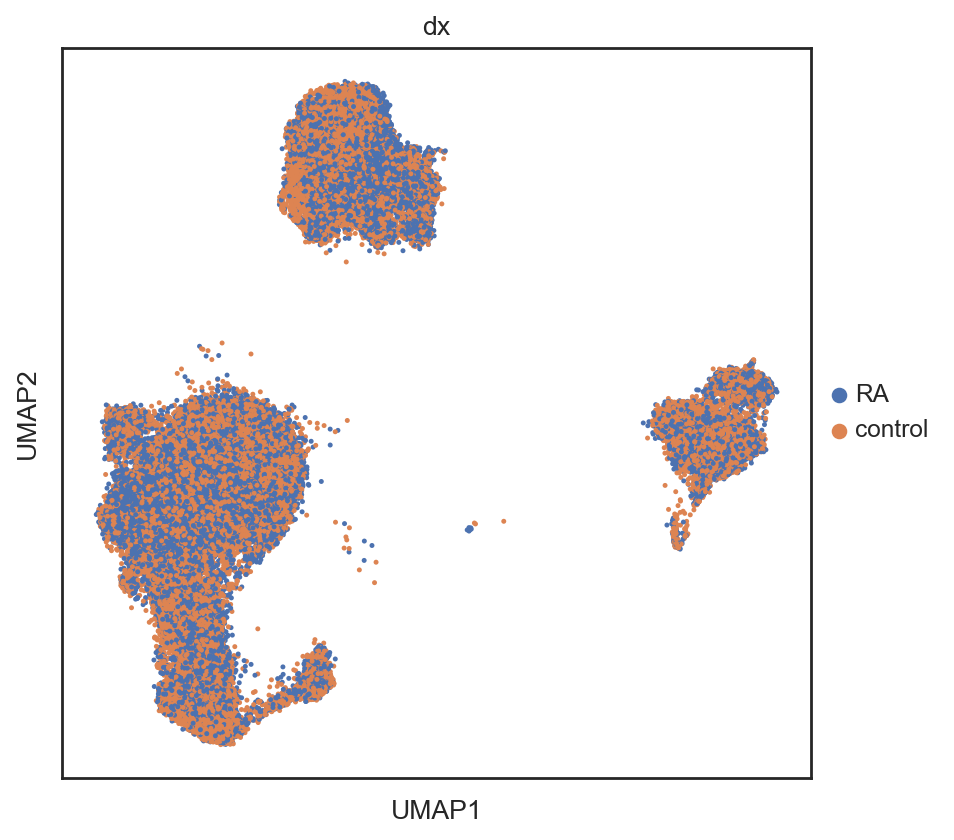

In [2]:
plt.rcParams["figure.figsize"] = (6,6)
inputPath = './dataOutput/adata/final.h5ad'

adata_final = sc.read(inputPath)
adata_final.uns['log1p']['base'] = None

sc.pl.umap(adata_final, color=["dx"], groups = ['control','RA'],wspace=0.35, size=20, save ="RAProject_figure2A.pdf")


## Figure 2B

Cell proportion analysis between RA and Control

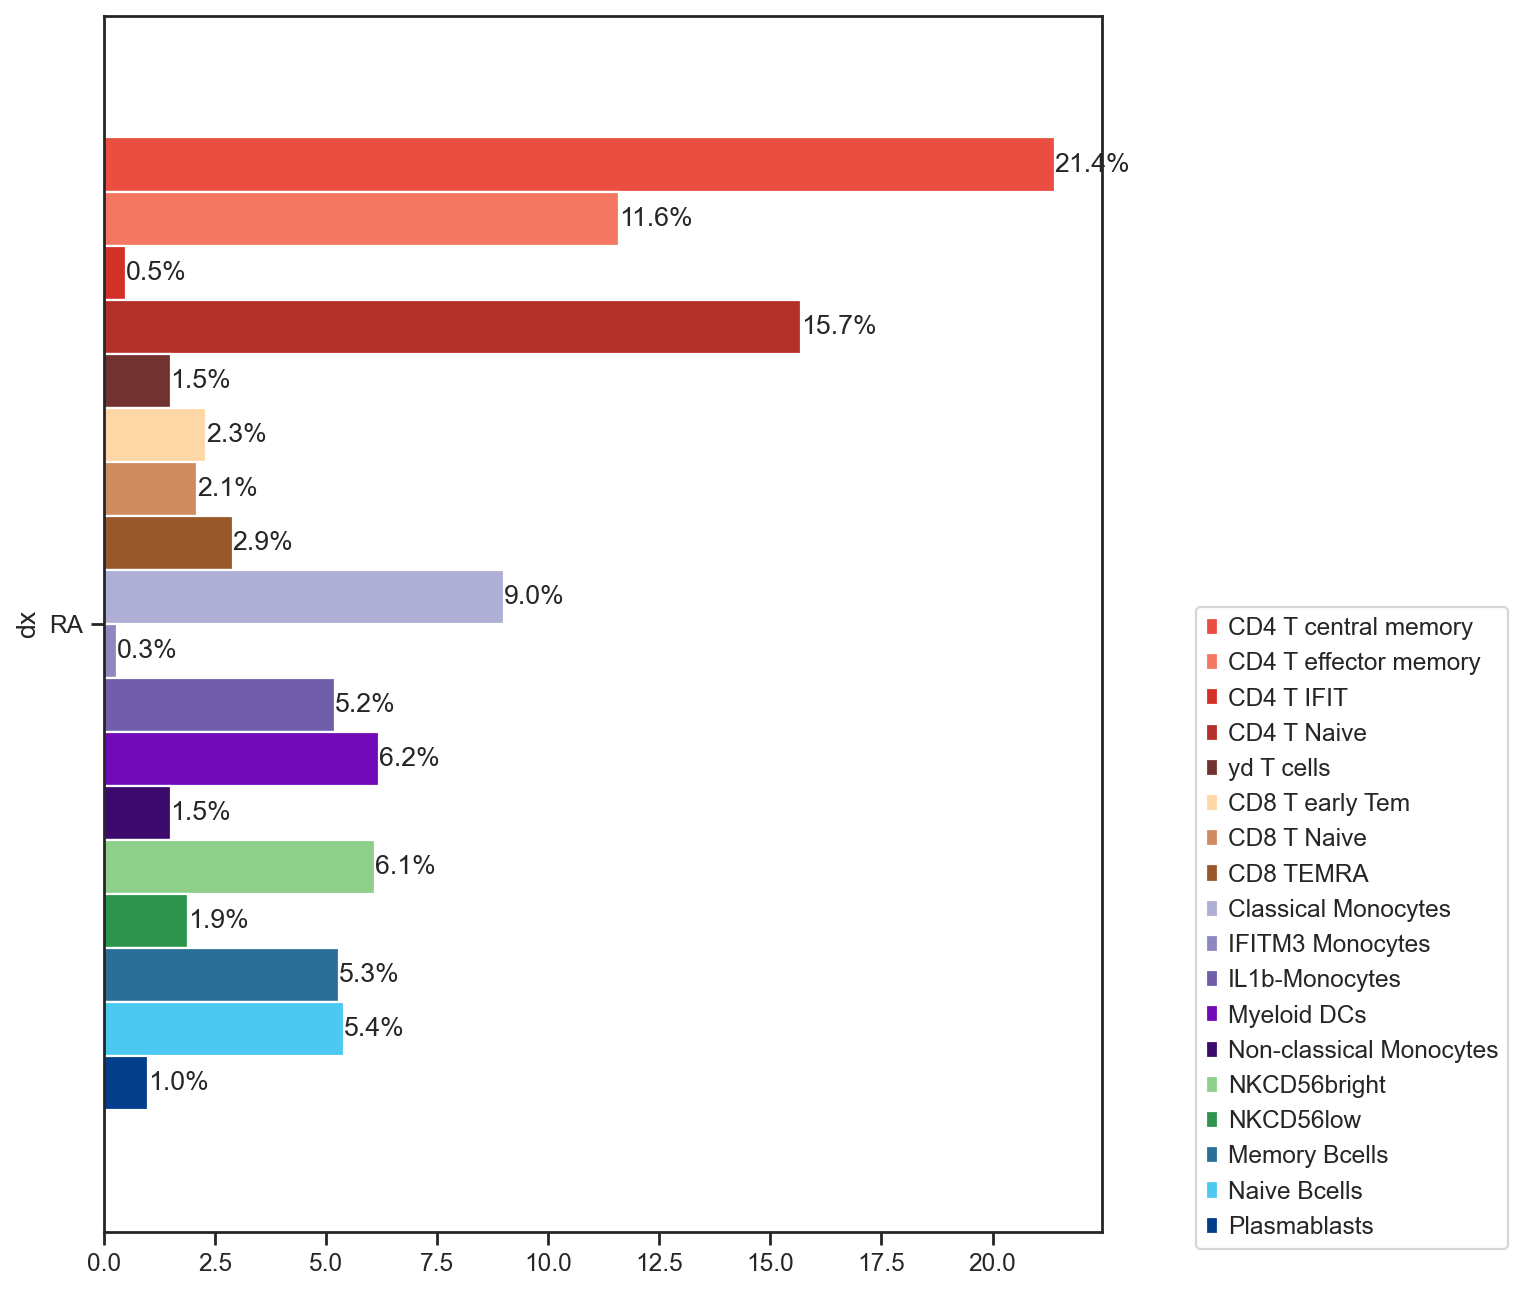

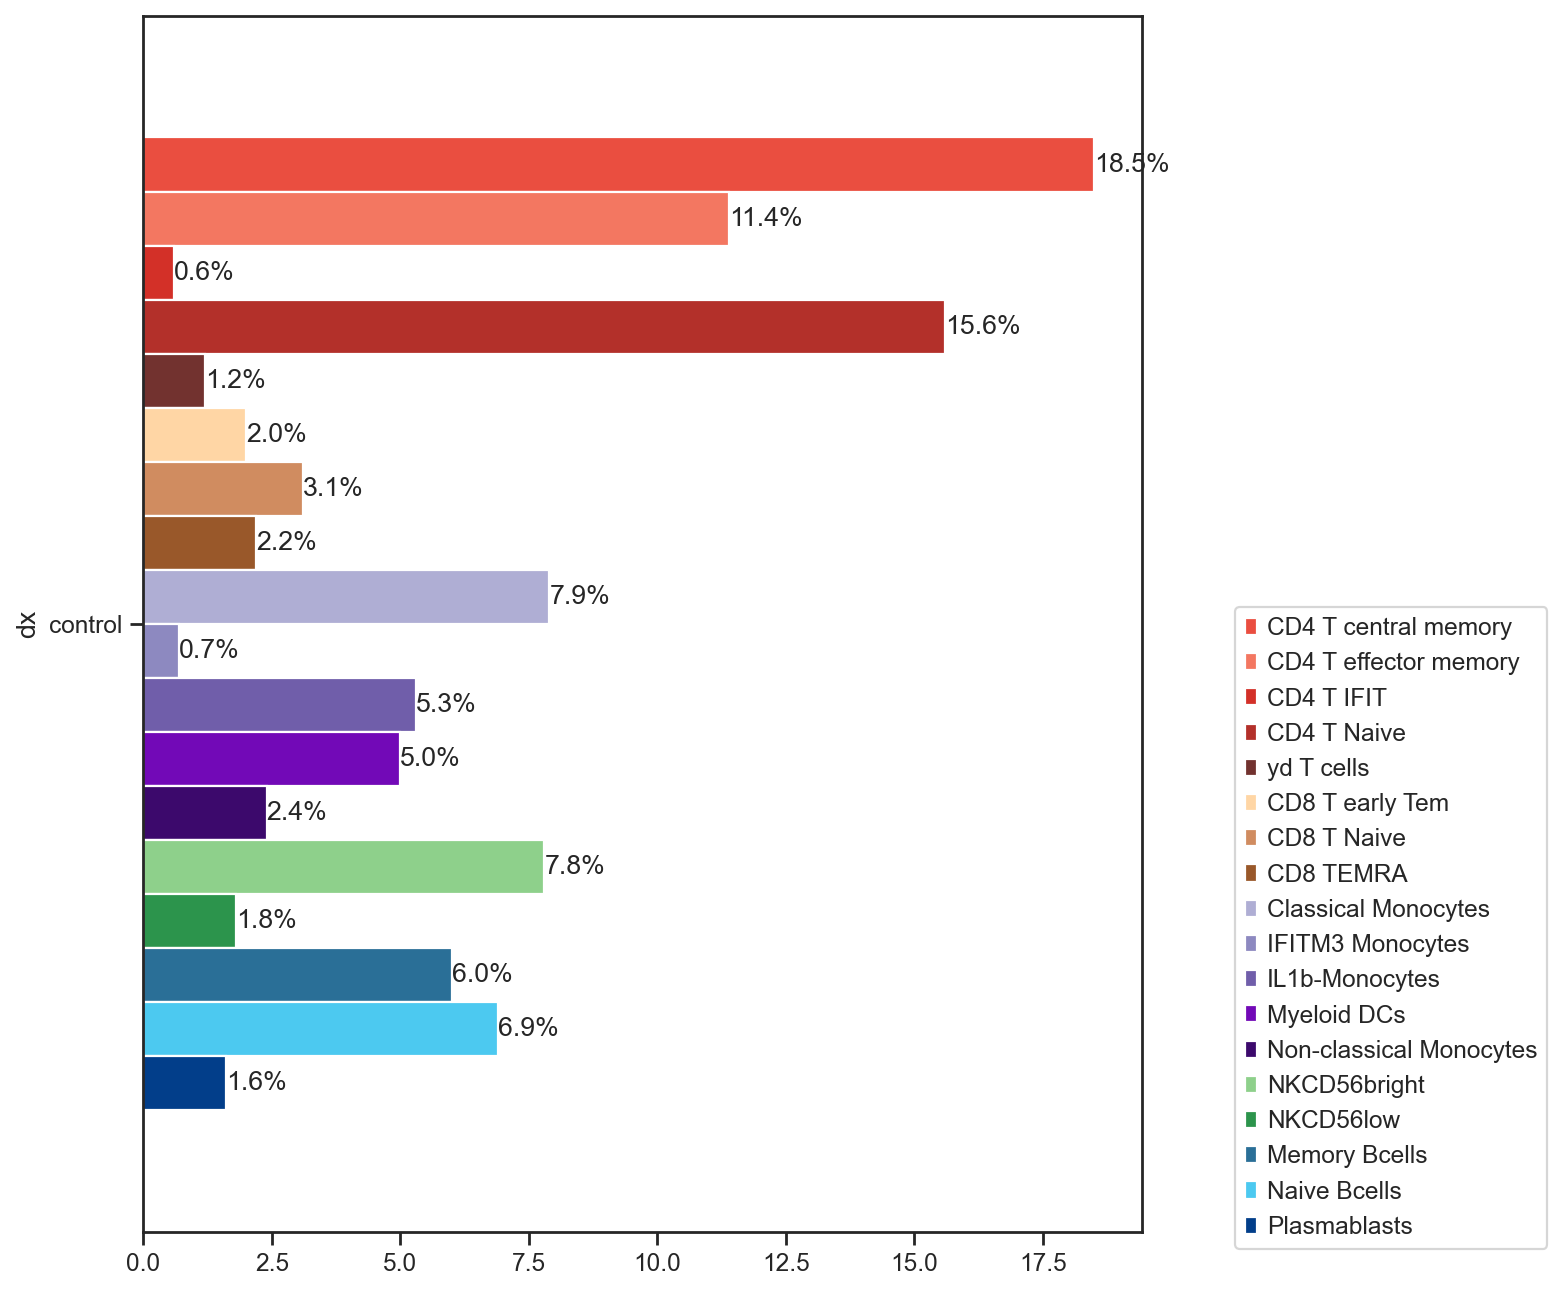

In [29]:
##### To do after the subset annotation
plt.rcParams['figure.figsize'] = [7, 5]

inputPath = './dataOutput/adata/final.h5ad'
comparison = 'dx'

adata_plot = sc.read(inputPath)

color_subset = ['#ea4e40','#f37761', '#d33028', '#b3302a', '#72322f',
                '#FFD6A5','#d08c60','#99582a',
                '#afaed4','#8d89c0','#705eaa', '#7209b7','#3c096c',
                '#8ed08b', '#2c944c',
                '#2a6f97','#4cc9f0','#023e8a','#0267c1',  '#A0C4FF']

### if comparison if disease activiy
adata_plot_RA = adata_plot[(adata_plot.obs[comparison] == "RA"),:]
adata_plot_control = adata_plot[(adata_plot.obs[comparison] == "control"),:]

tmp = pd.crosstab(adata_plot_RA.obs[comparison],adata_plot_RA.obs['fine_annot'], normalize='index')
tmp = round(tmp*100,1)
ax = tmp.plot(kind = "barh", width = 2,stacked=False, figsize=(8,10), color = color_subset)
ax.invert_yaxis()
ax.legend(loc='center', bbox_to_anchor=(1, 0., 0.5, 0.5))
for p in ax.containers:
    ax.bar_label(p, fmt='%.1f%%', label_type='edge')
plt.savefig('RA_proportion.pdf')


tmp = pd.crosstab(adata_plot_control.obs[comparison],adata_plot_control.obs['fine_annot'], normalize='index')
tmp = round(tmp*100,1)
ax = tmp.plot(kind = "barh", width = 2,stacked=False, figsize=(8,10), color = color_subset)
ax.invert_yaxis()
ax.legend(loc='center', bbox_to_anchor=(1, 0., 0.5, 0.5))
for p in ax.containers:
    ax.bar_label(p, fmt='%.1f%%', label_type='edge')
plt.savefig('control_proportion.pdf')



## Figure S3

Cell proportion analysis between RA and Control

computing density on 'umap'


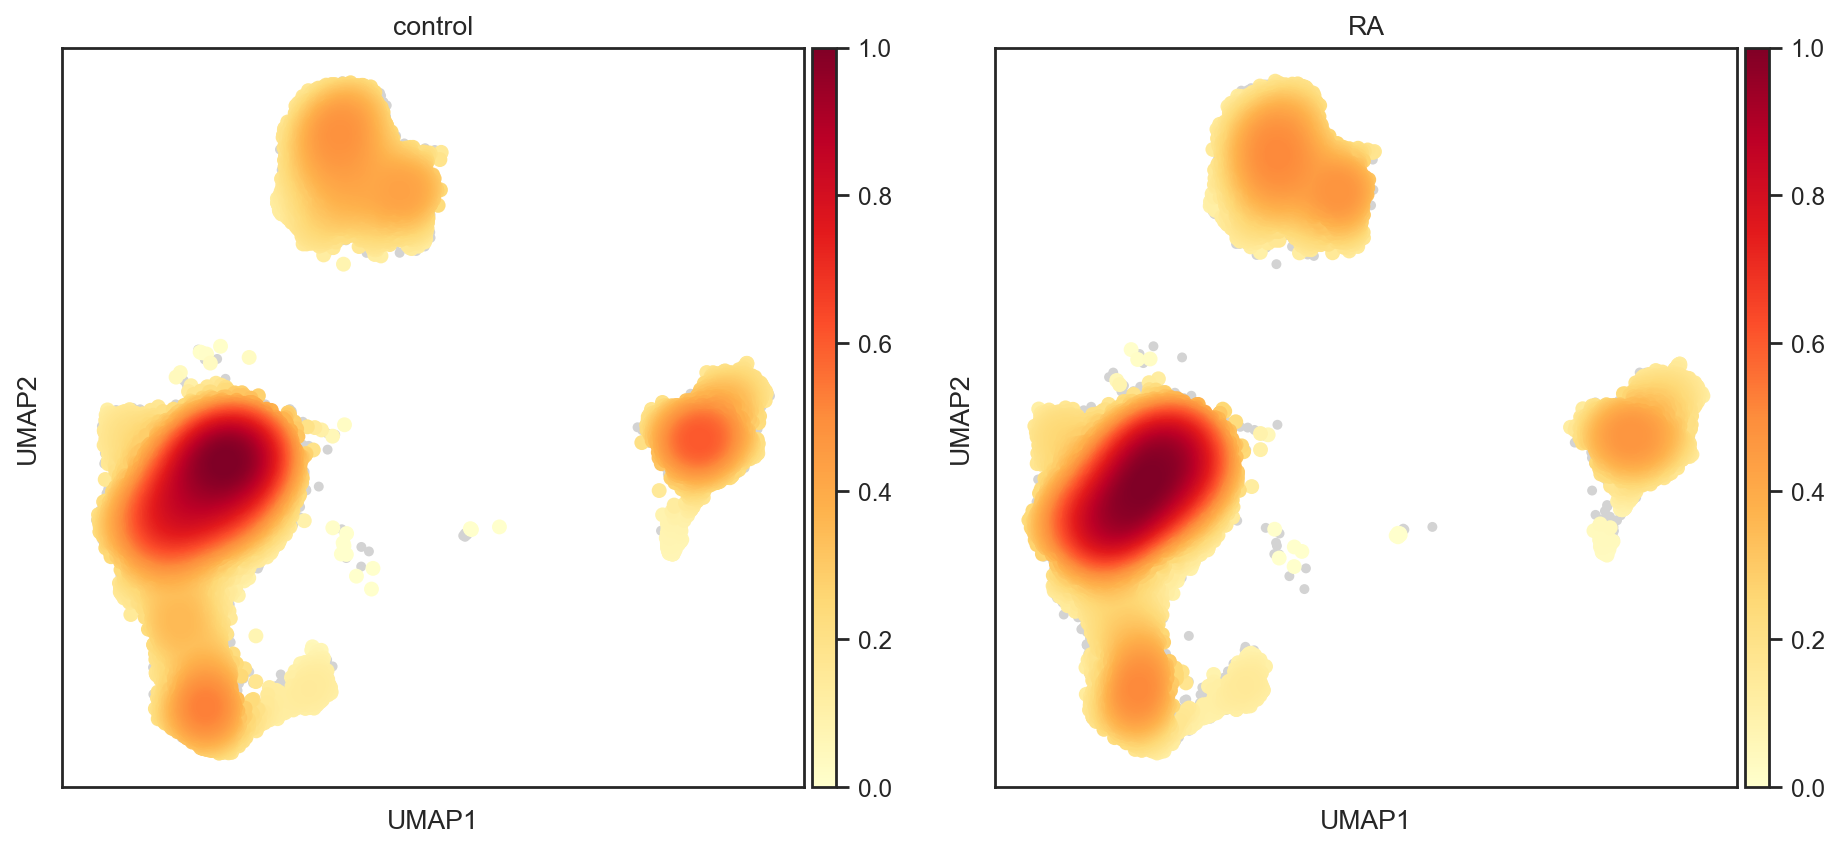

RA vs control (paired pvals): {'Bcells': 0.17425537109375, 'CD4Tcells': 0.4306793212890625, 'CD8Tcells': 0.644134521484375, 'Monocytes': 0.3778228759765625, 'NKcells': 0.4306793212890625}
computing density on 'umap'


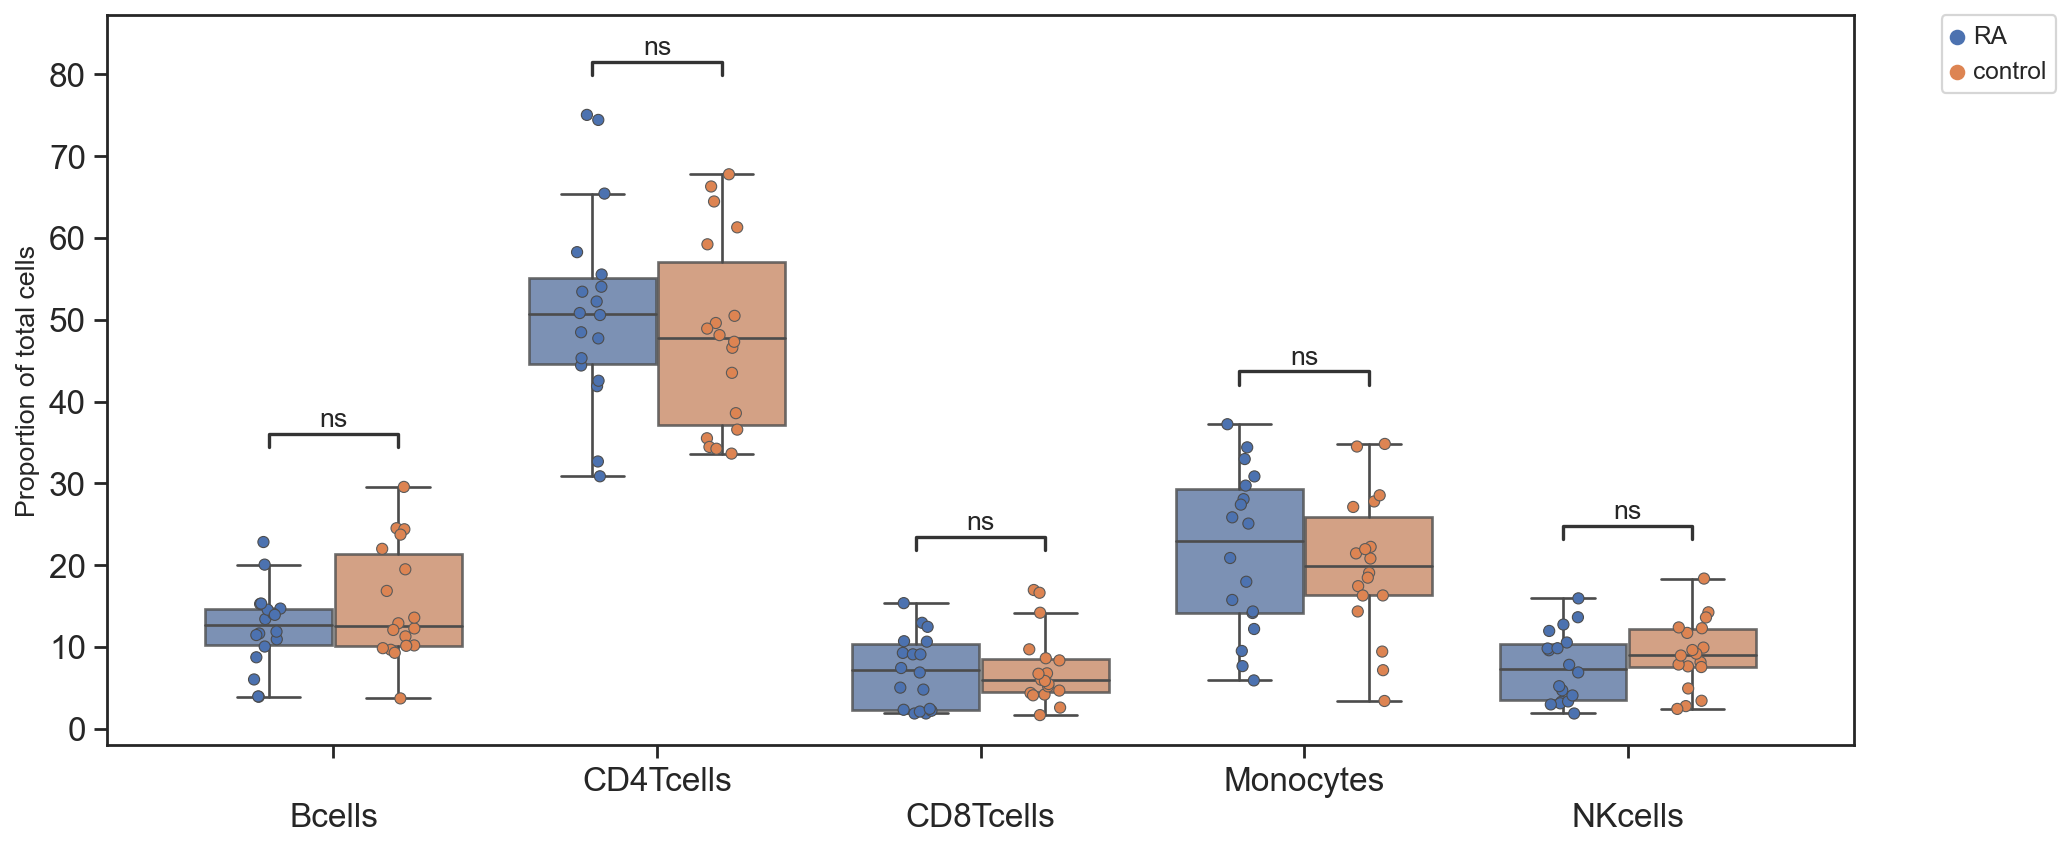

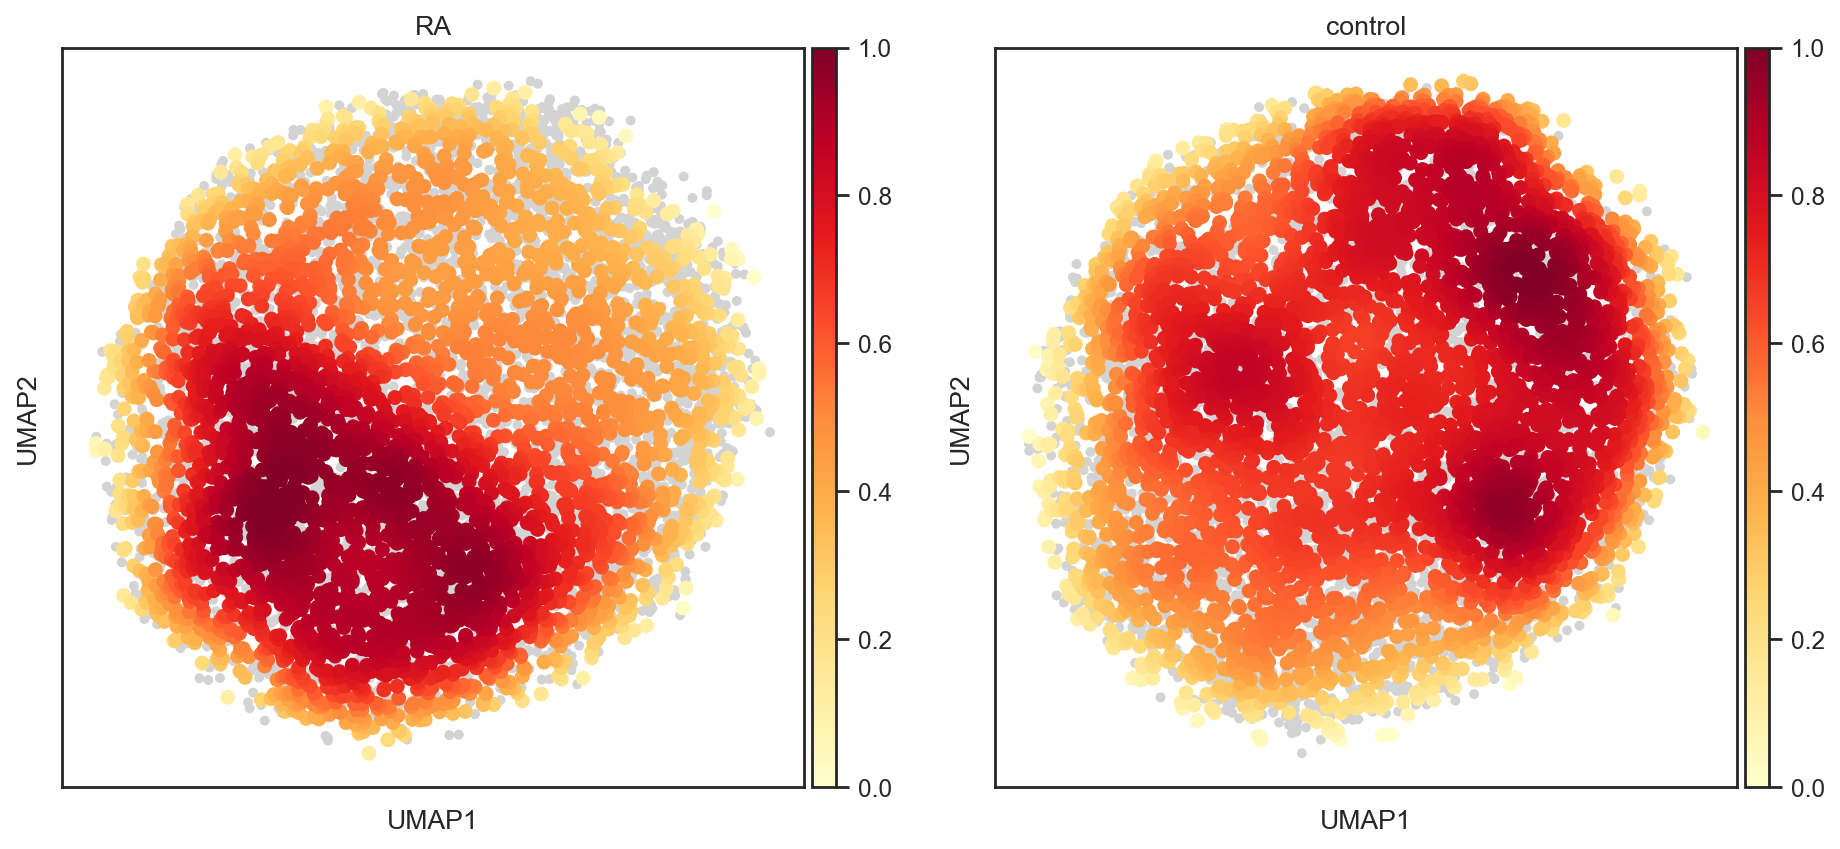

RA vs control (paired pvals): {'CD8 T Naive': 0.3778228759765625, 'CD8 T early Tem': 0.17425537109375, 'CD8 TEMRA': 1.0}
computing density on 'umap'


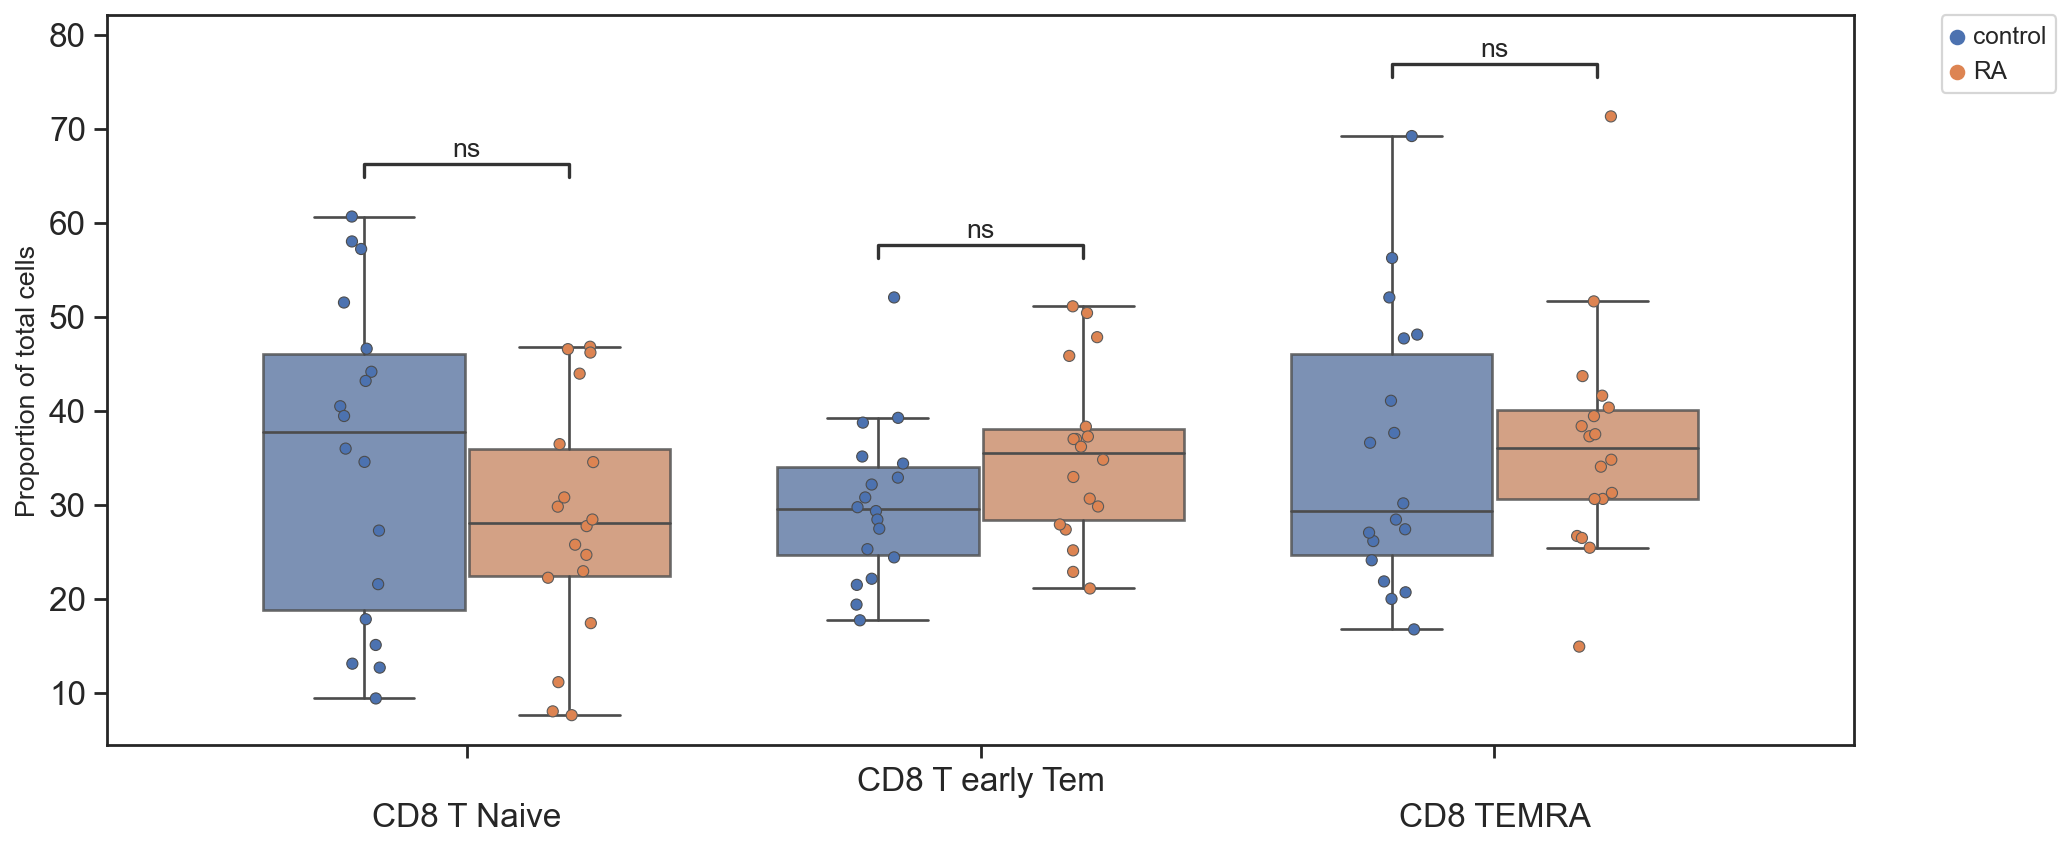

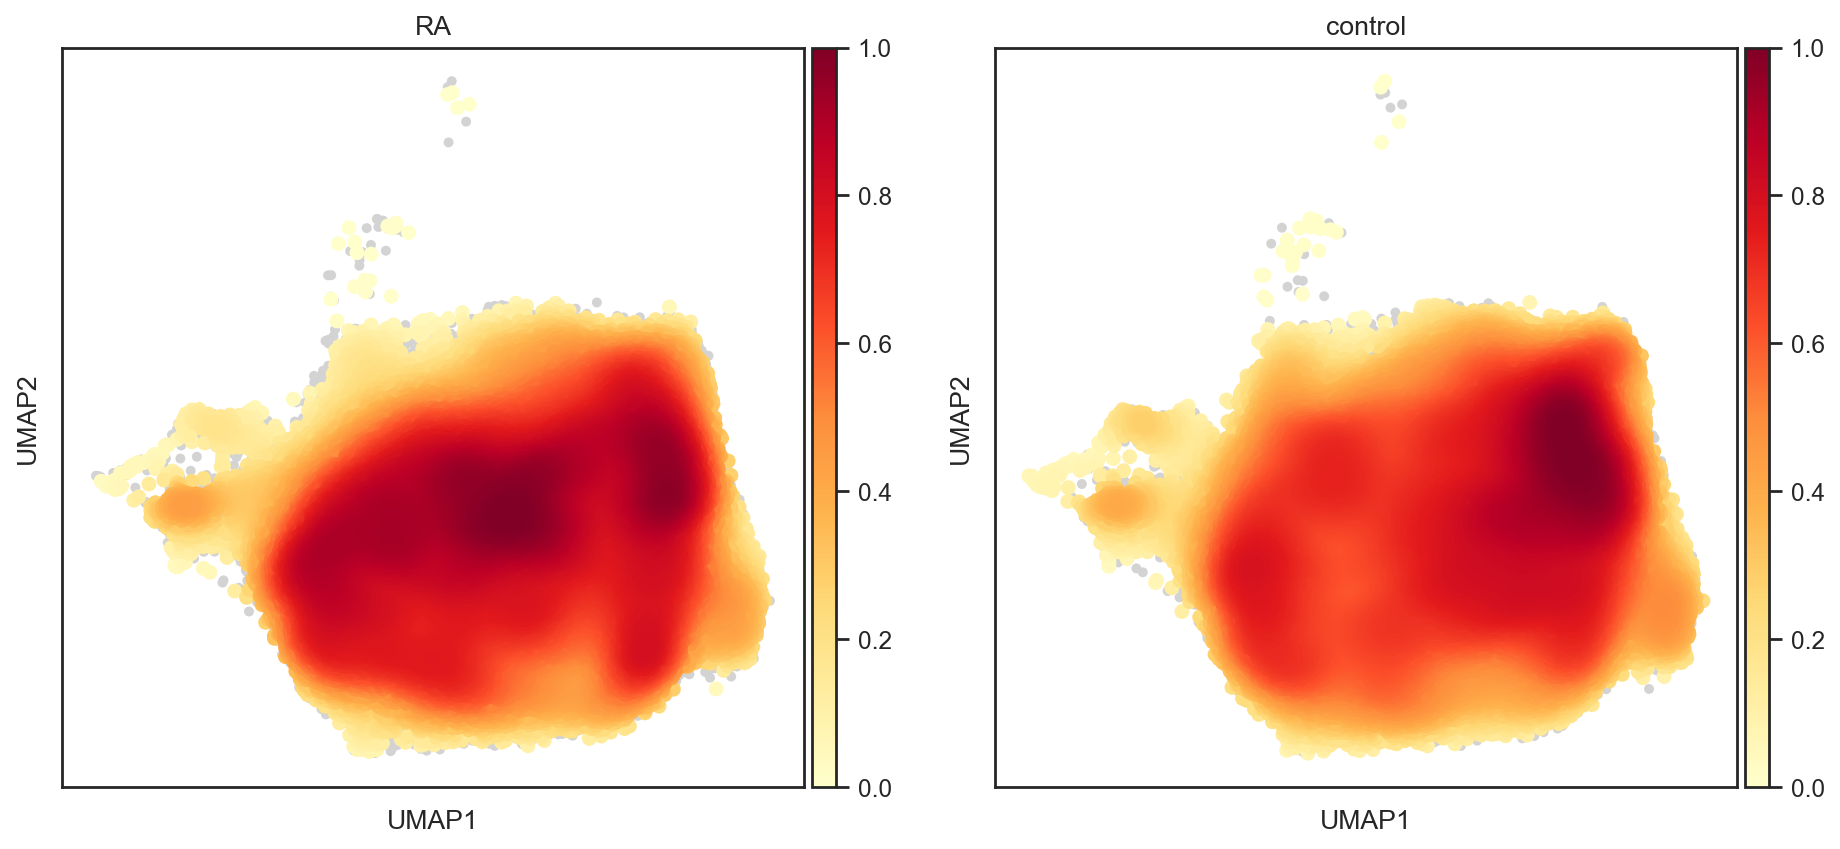

RA vs control (paired pvals): {'CD4 T IFIT': 0.981116590883351, 'CD4 T Naive': 0.4171142578125, 'CD4 T central memory': 0.34654998779296875, 'CD4 T effector memory': 0.7018814086914062, 'yd T cells': 0.49507904052734375}
computing density on 'umap'


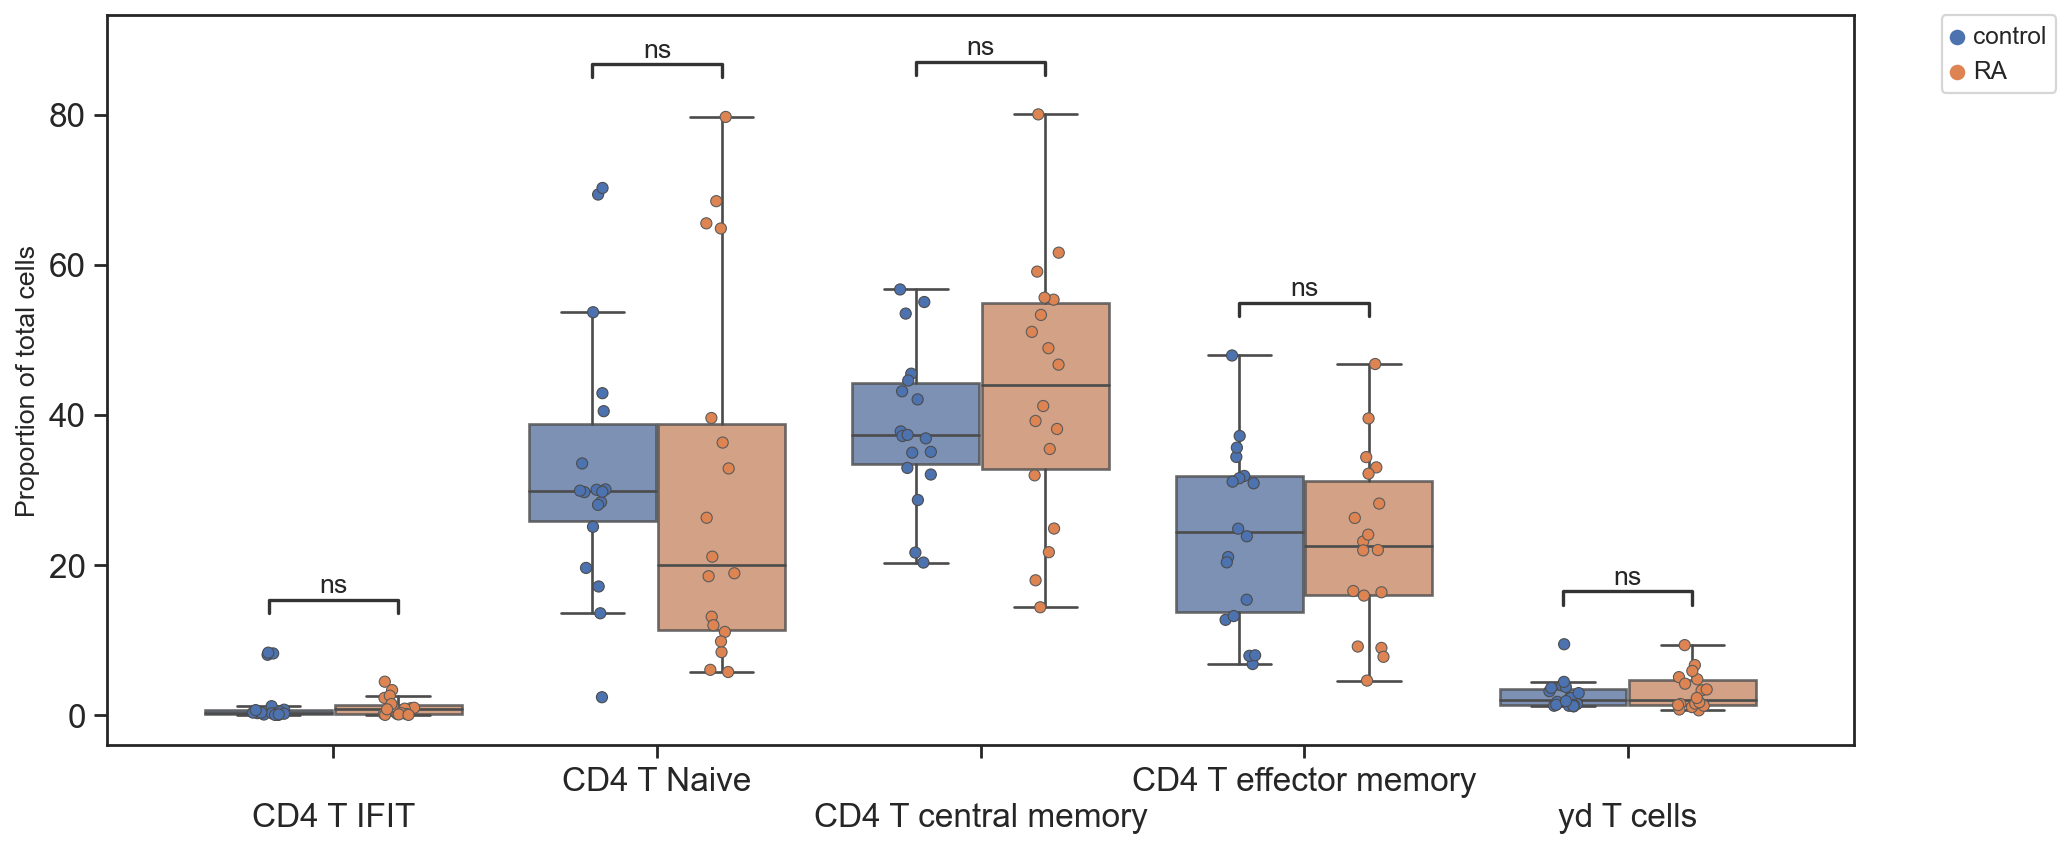

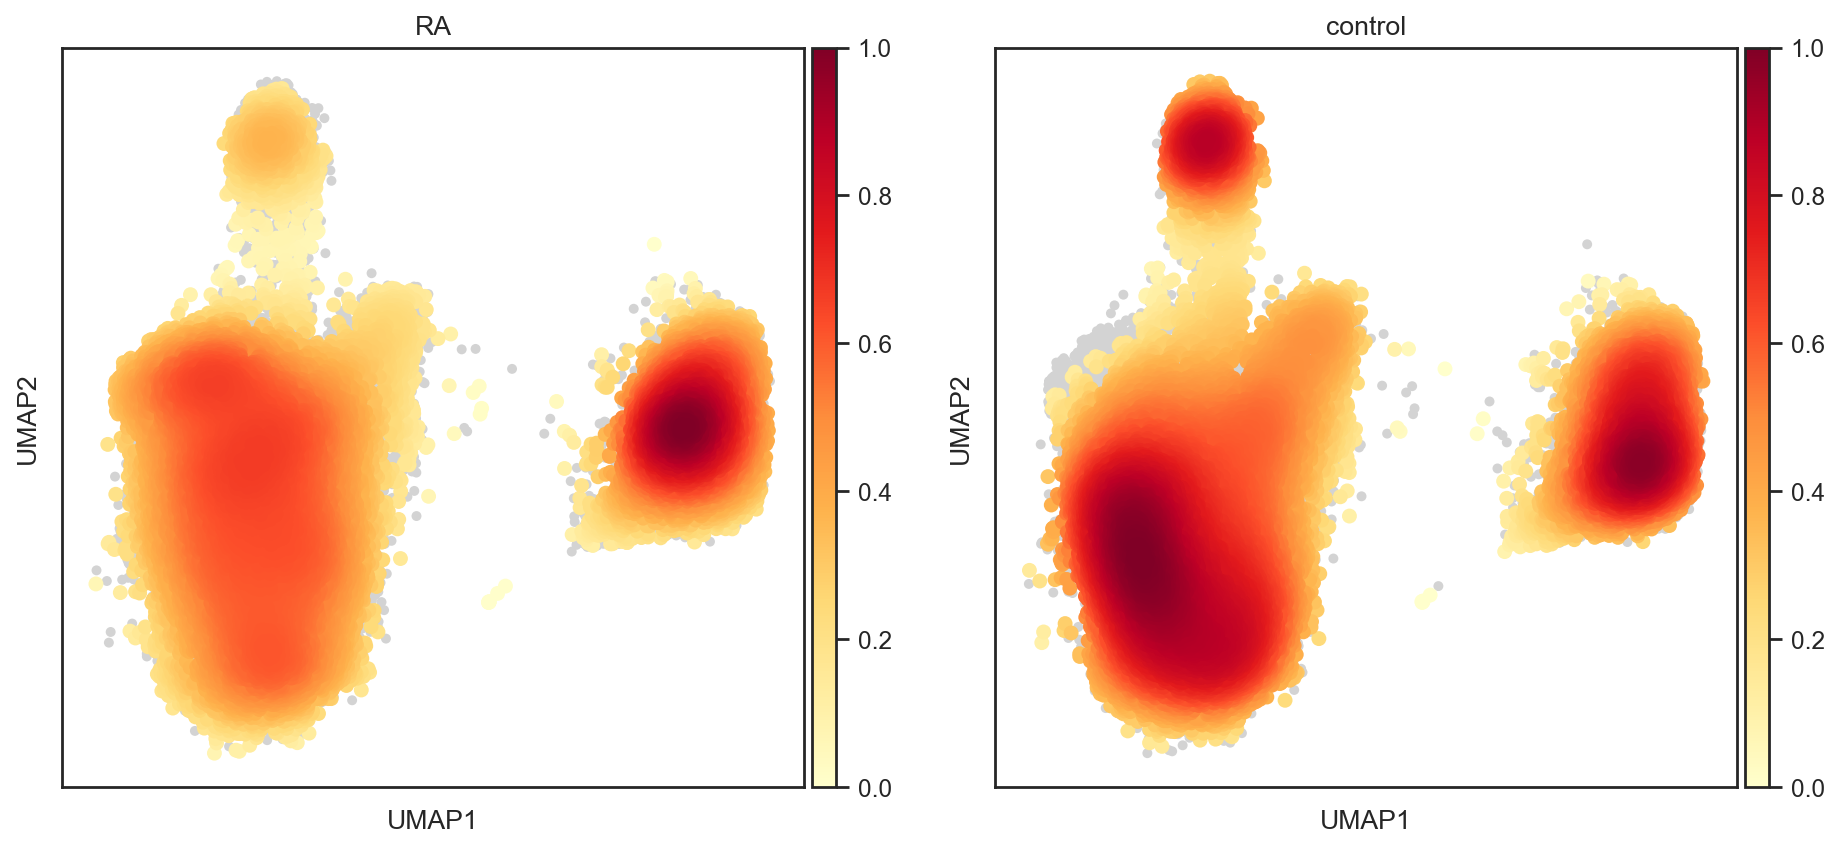

RA vs control (paired pvals): {'Classical Monocytes': 0.8650436401367188, 'IFITM3 Monocytes': 0.5861743444807836, 'IL1b-Monocytes': 0.550872802734375, 'Myeloid DCs': 0.49507904052734375, 'Non-classical Monocytes': 0.02367401123046875}
computing density on 'umap'


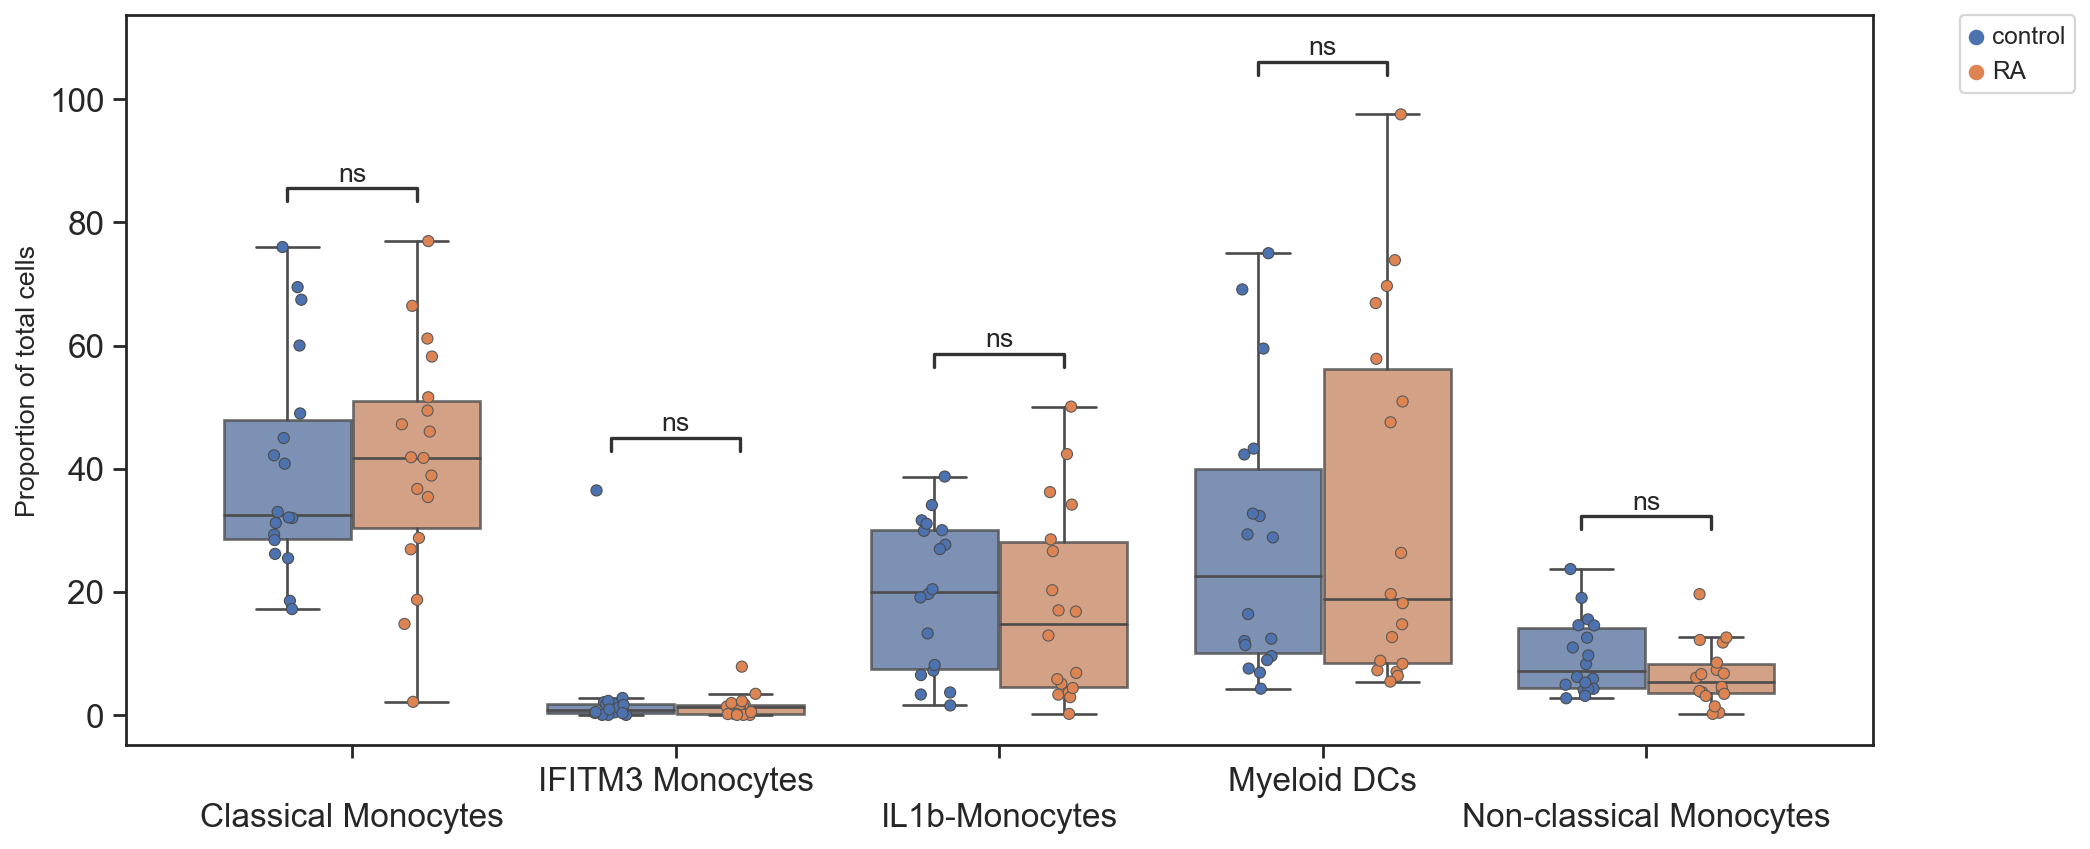

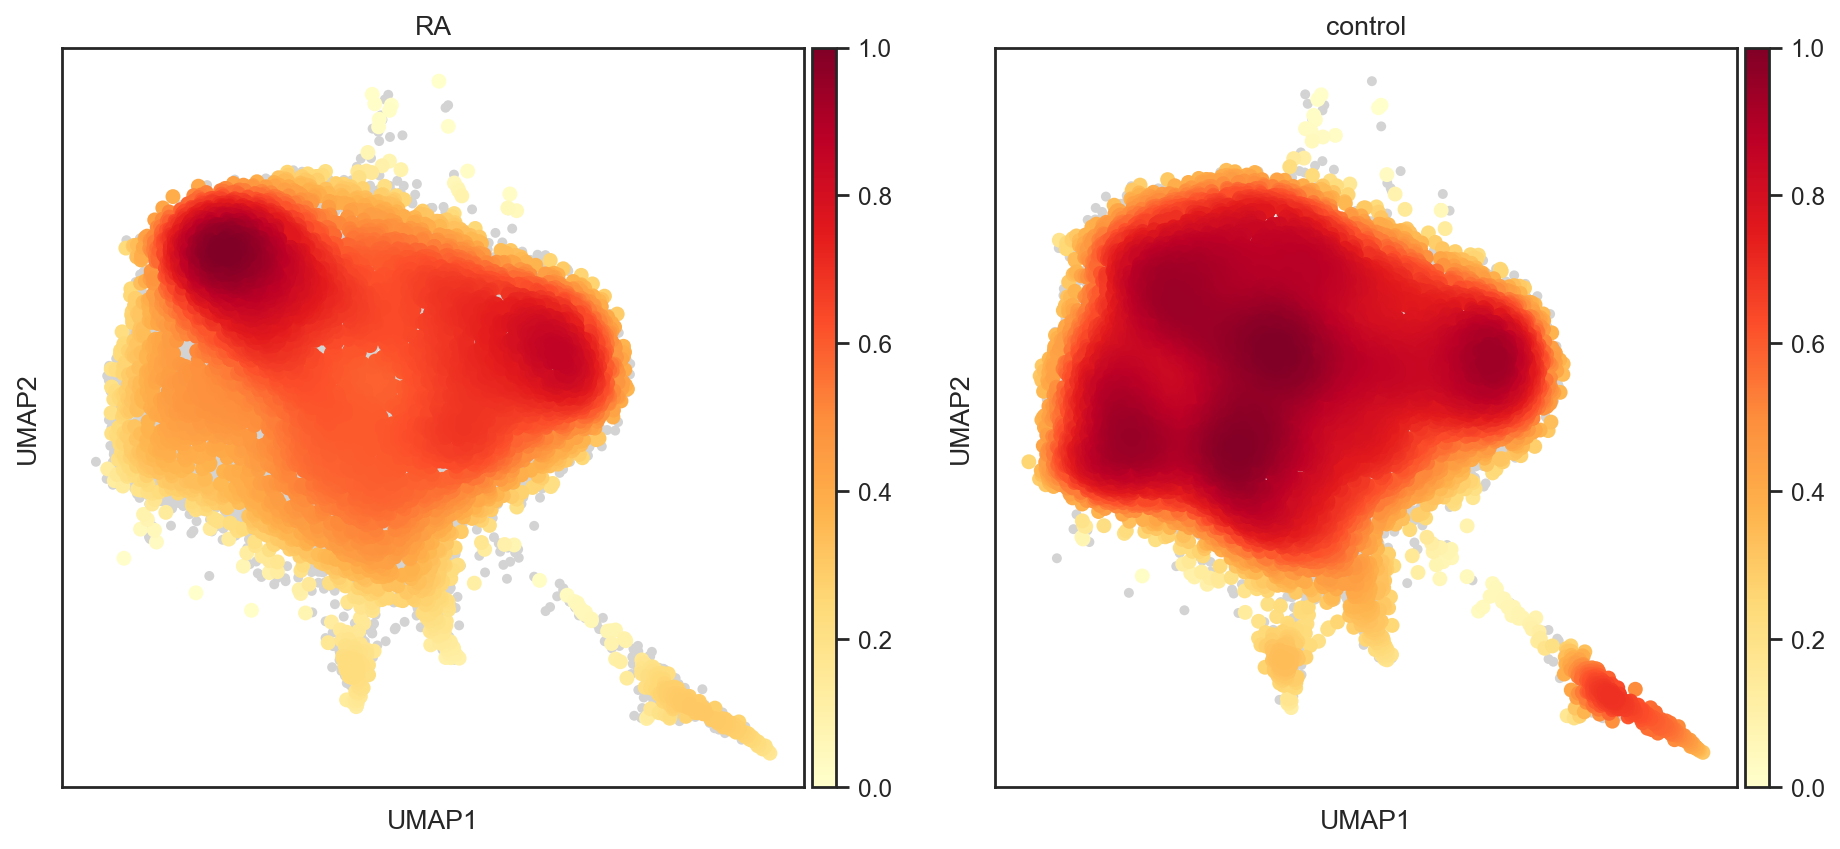

RA vs control (paired pvals): {'Memory Bcells': 0.30379486083984375, 'Naive Bcells': 0.4171142578125, 'Plasmablasts': 0.0599365234375}
computing density on 'umap'


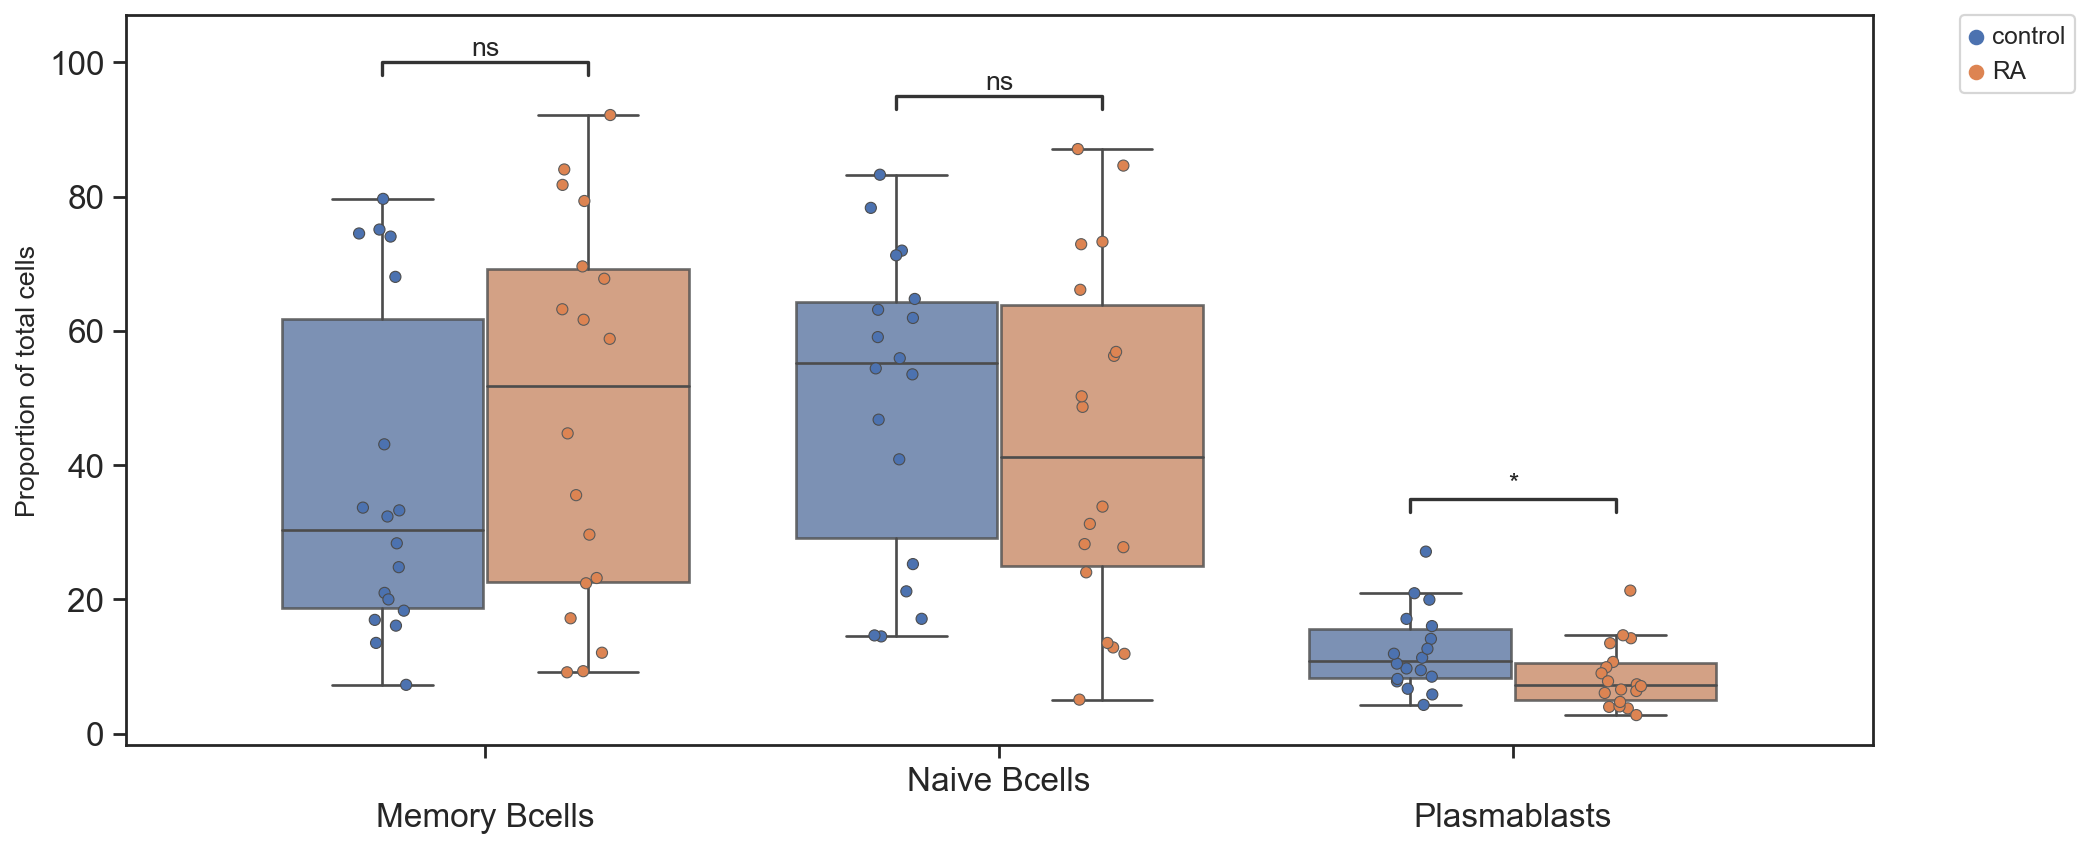

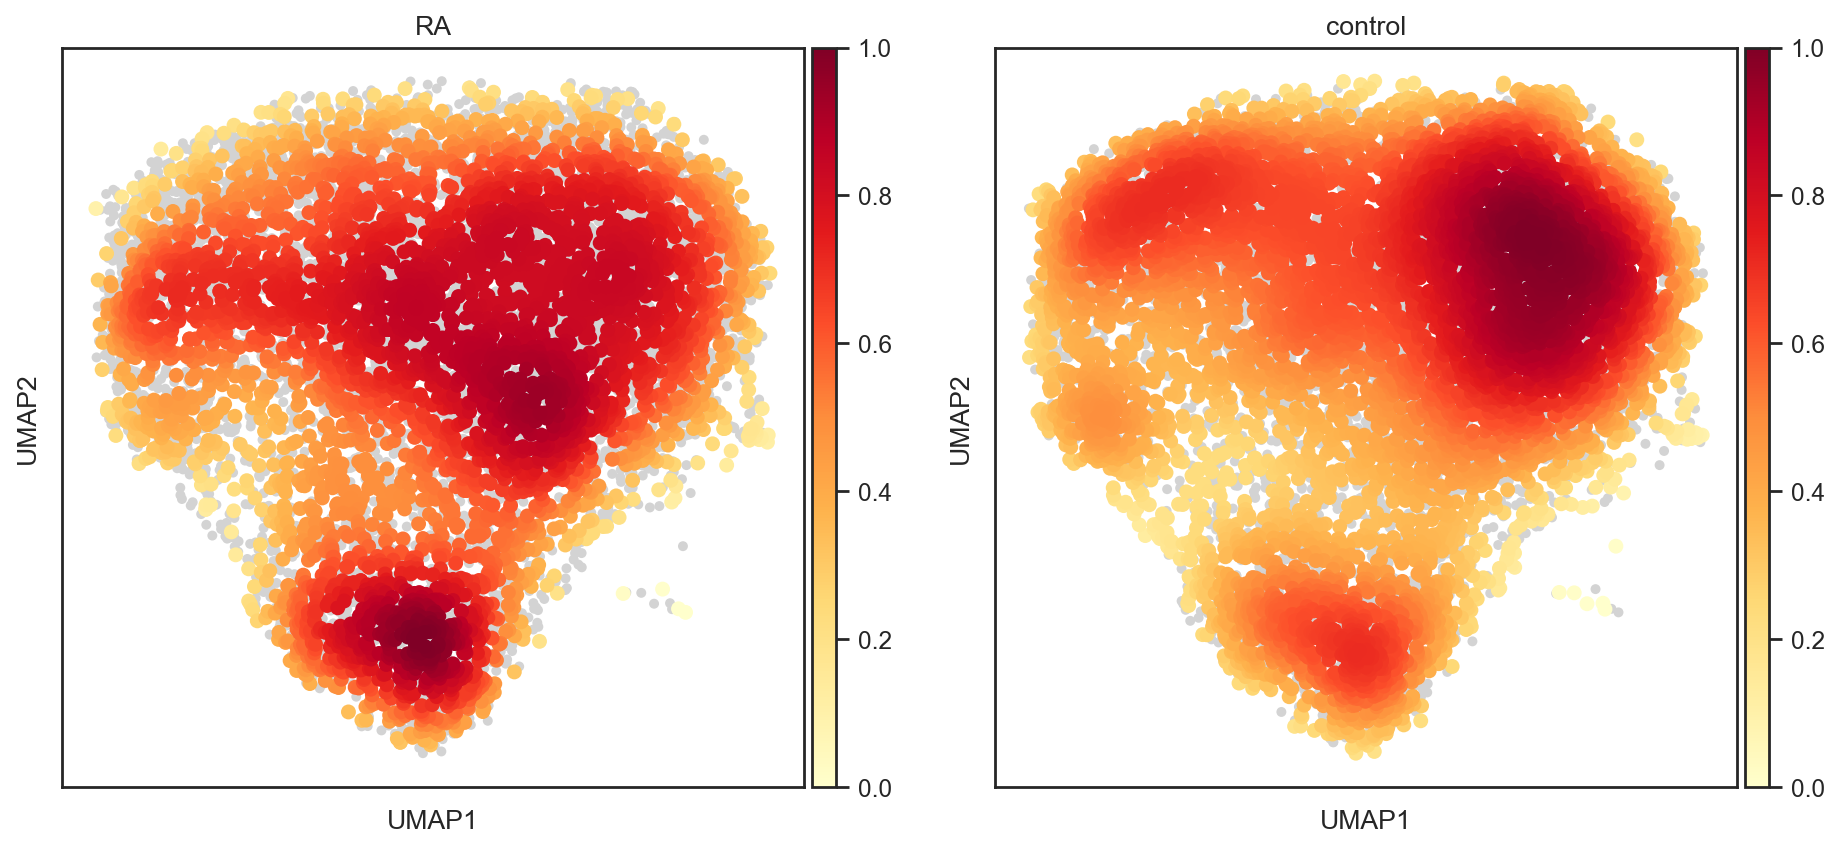

RA vs control (paired pvals): {'NKCD56bright': 0.3692169189453125, 'NKCD56low': 0.3692169189453125}


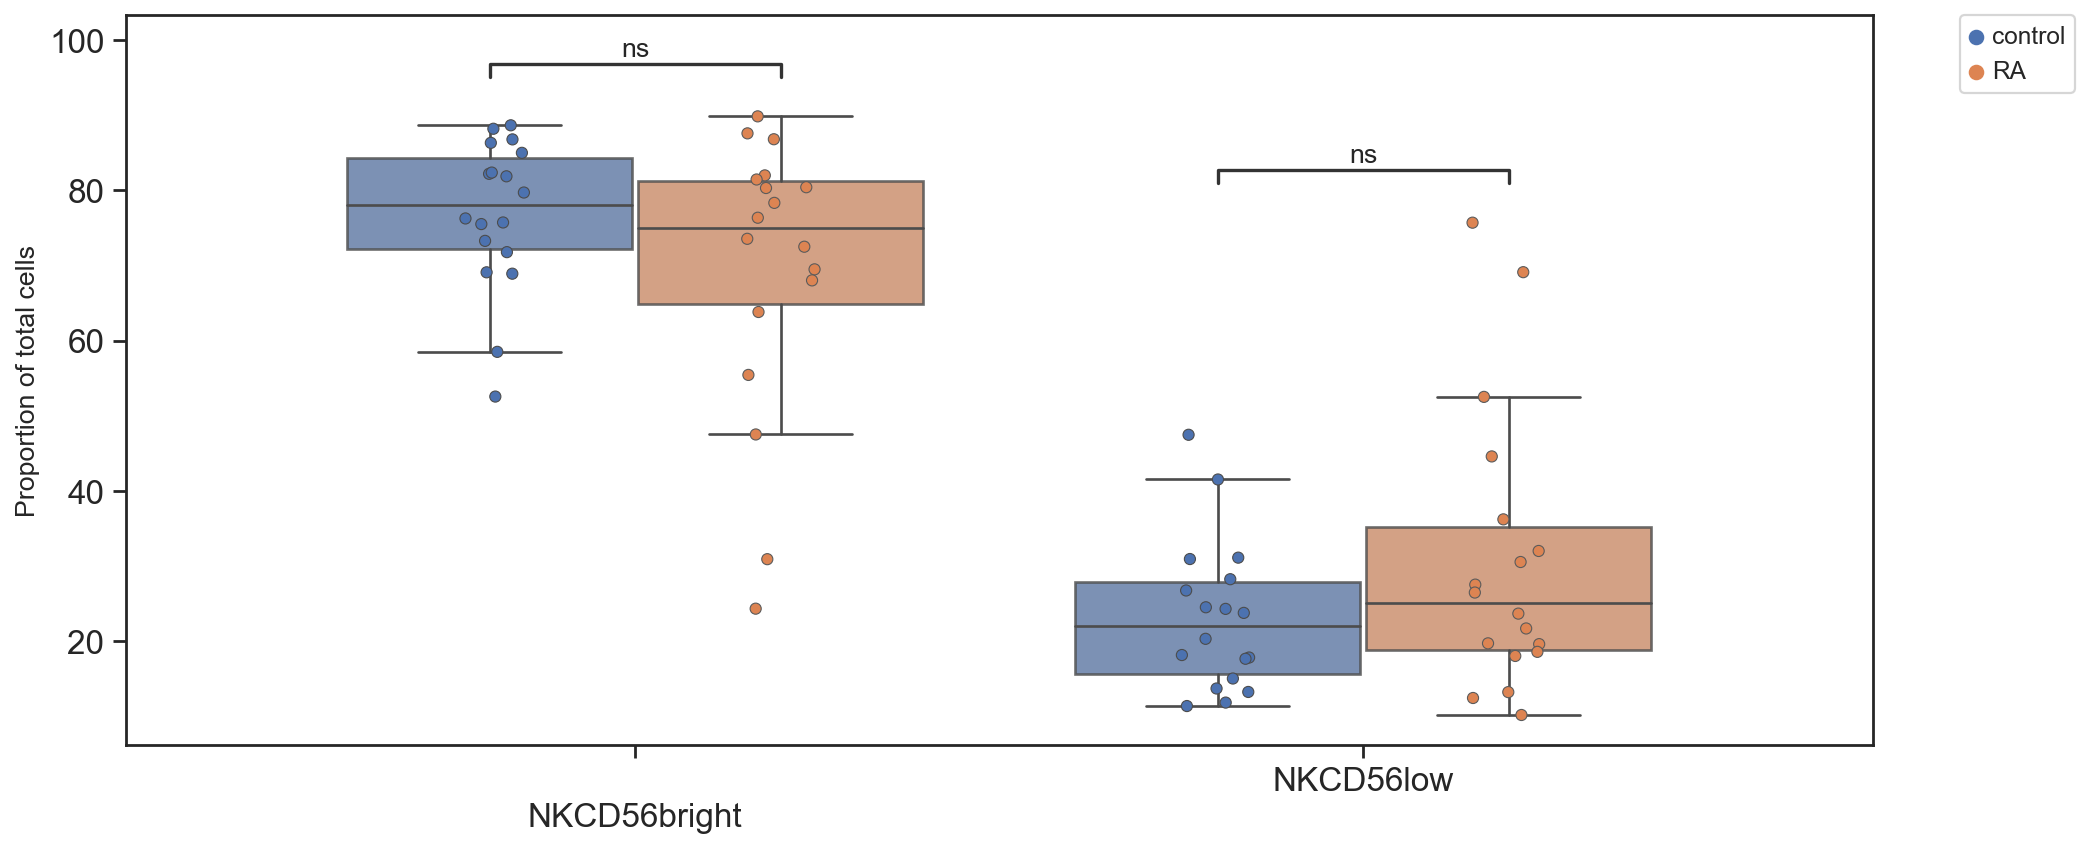

In [6]:
plt.rcParams["figure.figsize"] = (6,6)
cells=["CD8Tcells", "CD4Tcells", "Monocytes", "Bcells", "NKcells"]
final_annot = "fine_annot"
rank_key = "fine_annotation_rank"


### Params
color_subset = ['#ea4e40','#f37761', '#d33028', '#b3302a', '#72322f',
                '#FFD6A5','#d08c60','#99582a',
                '#afaed4','#8d89c0','#705eaa', '#7209b7','#3c096c',
                '#8ed08b', '#2c944c',
                '#2a6f97','#4cc9f0','#023e8a','#0267c1',  '#A0C4FF']

### Load data
adata = sc.read('./dataOutput/adata/final.h5ad')

# keep only control 7 from batch 3
adata= adata[~(adata.obs["Sample"].str.contains("Control07") & adata.obs["batch"].str.contains("1|2")),:]

### RA vs control
# Density plot
sc.tl.embedding_density(adata, basis='umap', groupby="dx")
sc.pl.embedding_density(adata, basis='umap', key="umap_density_%s"%"dx", 
                            group=["control", "RA"], save="FigureS3A_all.pdf")

# unpaired analysis
cell_subset_df = compositionalAnalysis(adata, hue_groups=["RA", "control"], corr=None, hue="dx",
                                       subset_col="rough_annot", sample_col="Sample", single_pair=True, 
                                       filename= "./figures/FigureS3B_all_proportion_RAvsControl.pdf",
                          height=6, width=14, min_cells=0, density=False, stats_test=scipy.stats.mannwhitneyu, return_df=True)

# Paired testing statistics
cell_subset_df["pair_index_CW"] = cell_subset_df["Sample"].map(dict(zip(adata.obs["Sample"], adata.obs["pair_index_CW"])))
pvals = pairedTestByCellType(cell_subset_df, subset_col="rough_annot", groupby="dx", 
                     groupA="RA", groupB="control",  pair_index="pair_index_CW", 
                     compare_col="proportion", corr=None, stats_test=scipy.stats.wilcoxon) #ttest_rel
print("RA vs control (paired pvals): %s"%str(pvals))


### plotting
for subset in cells:
    adata_sub  = sc.read("./dataOutput/subset_adata/" + subset +"_clustered.h5ad")
    # remove control 7 from batches 1 & 2
    adata_plot=adata_sub[~(adata_sub.obs["Sample"].str.contains("Control07") & adata_sub.obs["batch"].str.contains("1|2")),:]
    
    ### RA vs control
    groupby = "dx"
    # Density plot
    sc.tl.embedding_density(adata_sub, basis='umap', groupby=groupby)
    sc.pl.embedding_density(adata_sub, basis='umap', key="umap_density_%s"%groupby, 
                            group=["RA", "control"], save="Figure3A_%s.pdf"%subset)
    
    # Unpaired proportion analysis (activity vs no activity vs control)
    cell_subset_df = compositionalAnalysis(adata_sub, hue_groups=["control", "RA"], corr=None, 
                                           filename= "./figures/FigureS3B_%s_proportion_RAvsControl.pdf"%subset, hue=groupby, 
                                           subset_col=final_annot, sample_col="Sample", single_pair=True, 
                          height=6, width=14, min_cells=0, density=False, stats_test=scipy.stats.mannwhitneyu)
    
    # Paired testing statistics
    cell_subset_df["pair_index_CW"] = cell_subset_df["Sample"].map(dict(zip(adata_sub.obs["Sample"], adata_sub.obs["pair_index_CW"])))
    pvals = pairedTestByCellType(cell_subset_df, subset_col=final_annot, groupby=groupby, 
                         groupA="RA", groupB="control",  pair_index="pair_index_CW", 
                         compare_col="proportion", corr=None, stats_test=scipy.stats.wilcoxon) #ttest_rel
    print("RA vs control (paired pvals): %s"%str(pvals))
    
